Author: Bhimraj Yadav

## Preprocessing

In [3]:
# imporing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset into a pandas dataframe
df = pd.read_csv('Iris.csv')

# dropping ID column
df.drop(columns=['Id'],axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# checking for null values
print(df.isnull().sum())

df.info()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
# class counts
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [16]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Visualizaion

/tmp/ipykernel_2215/3101958662.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


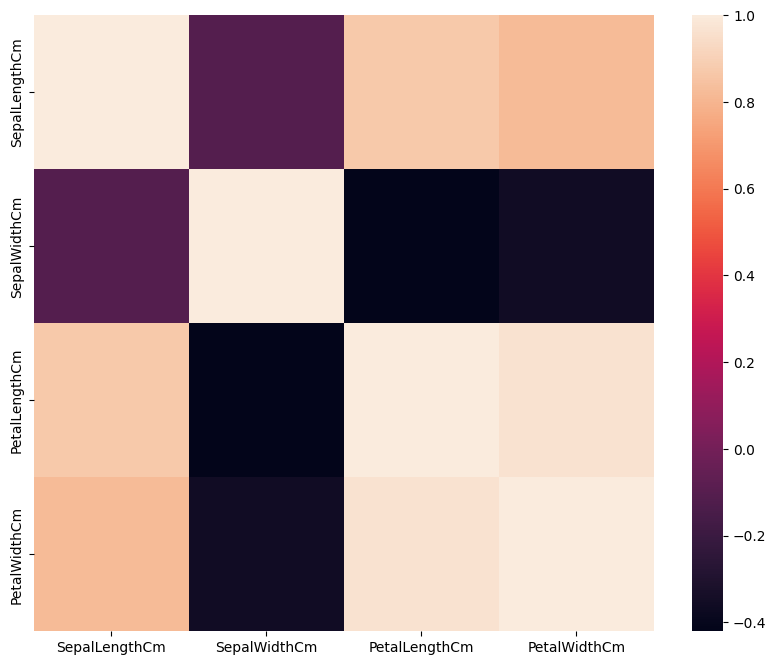

In [33]:
# checking correlaion
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.show()

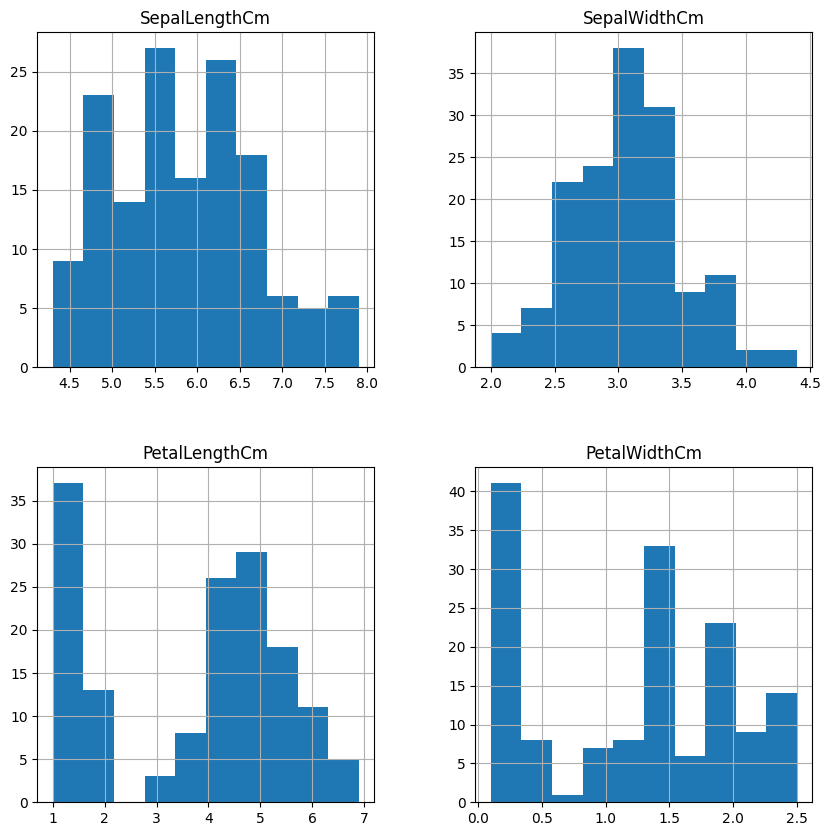

In [39]:
# Creating histogram to visualize the distribution of each variable
df.hist(figsize=(10,10))
plt.show()

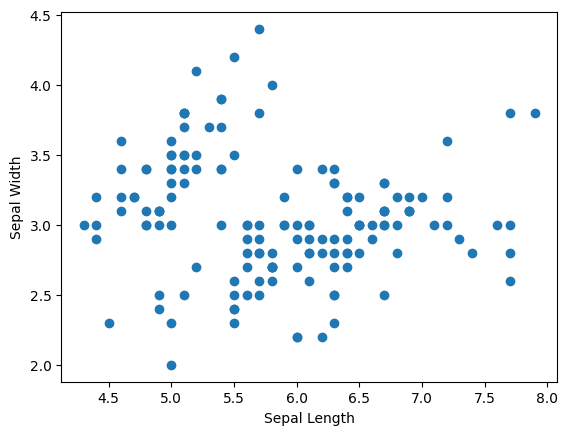

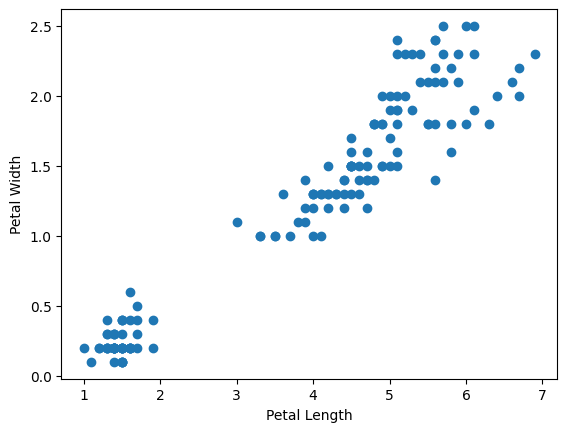

In [35]:
# Create scatterplots to visualize the relationships between variables
plt.scatter(df["SepalLengthCm"], df["SepalWidthCm"])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

plt.scatter(df["PetalLengthCm"], df["PetalWidthCm"])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

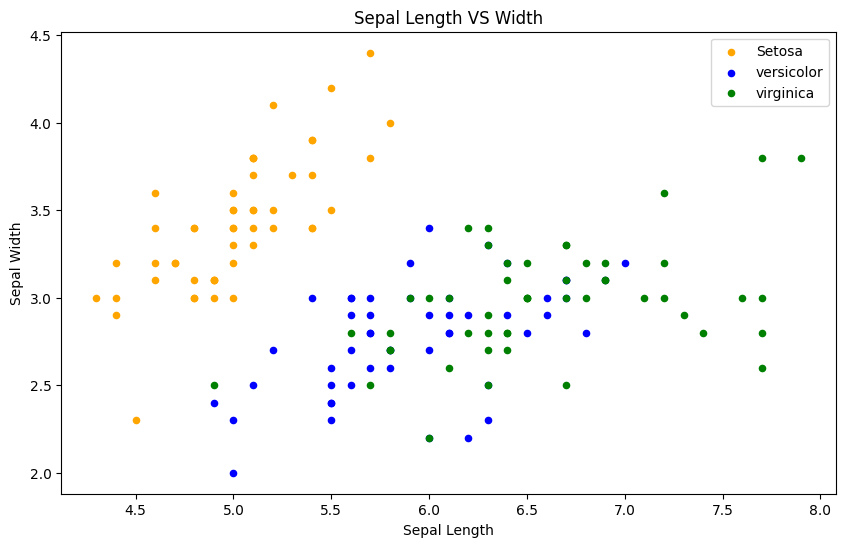

In [31]:
fig = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

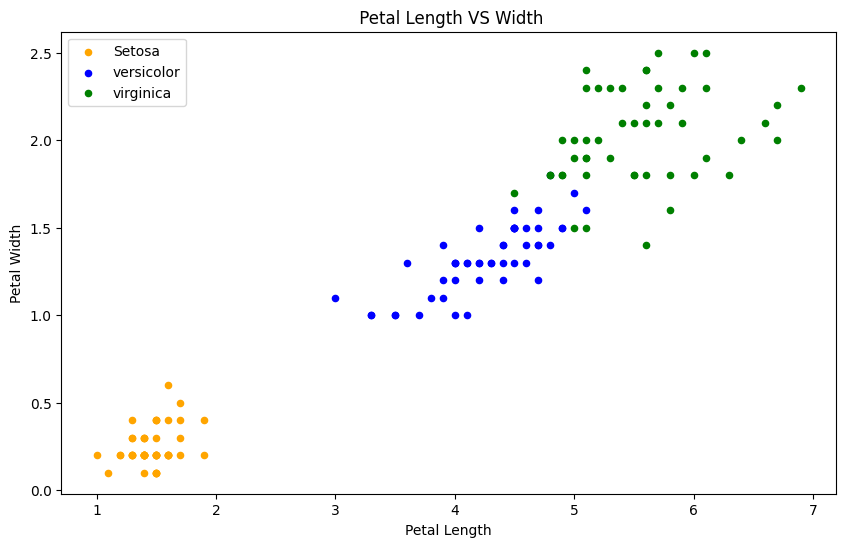

In [40]:
fig = df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

<AxesSubplot: xlabel='Species', ylabel='SepalWidthCm'>

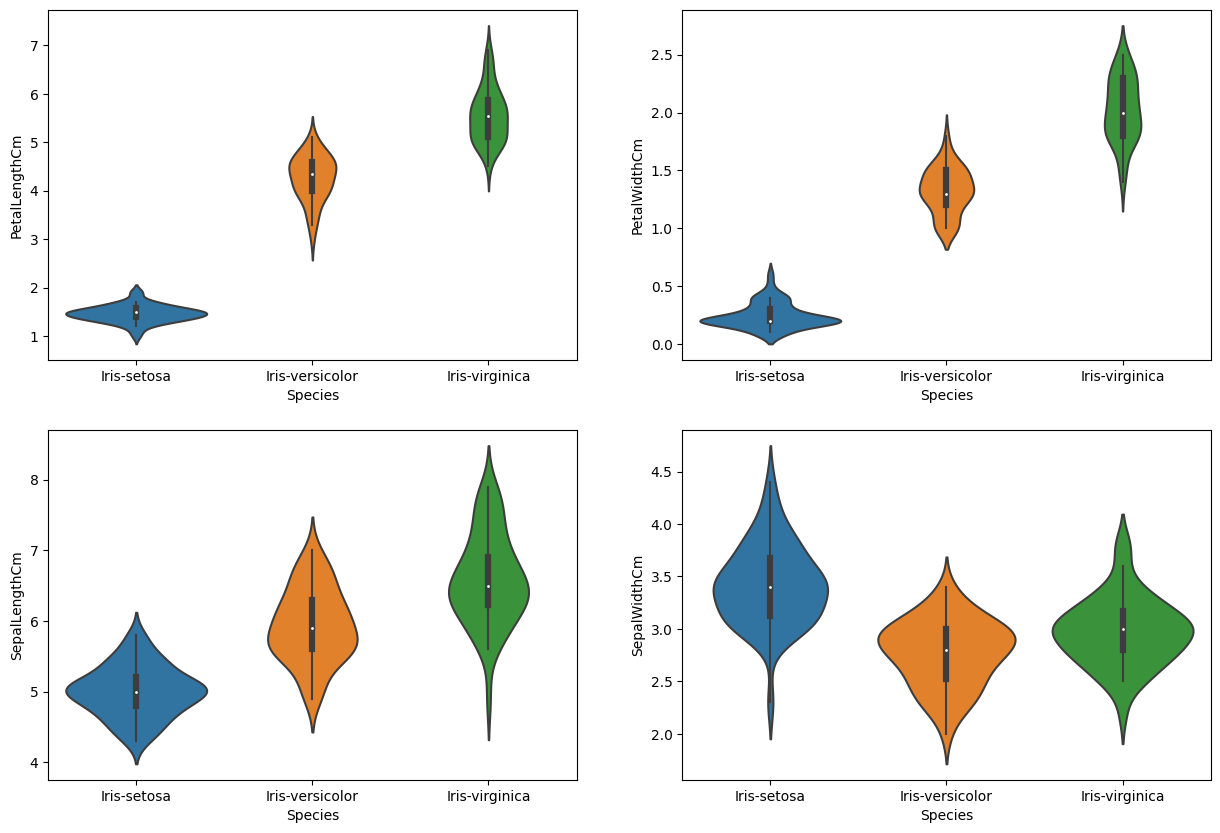

In [41]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)


The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

<AxesSubplot: xlabel='Species', ylabel='PetalLengthCm'>

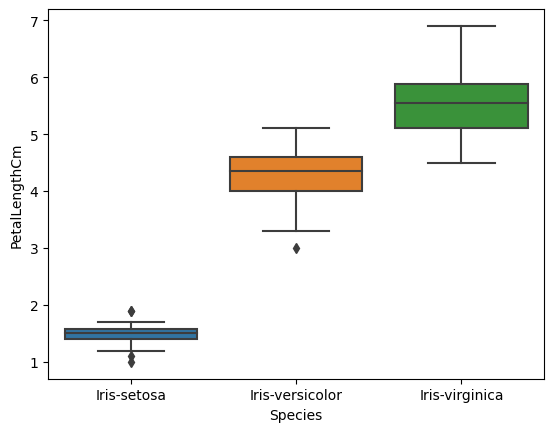

In [42]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=df)

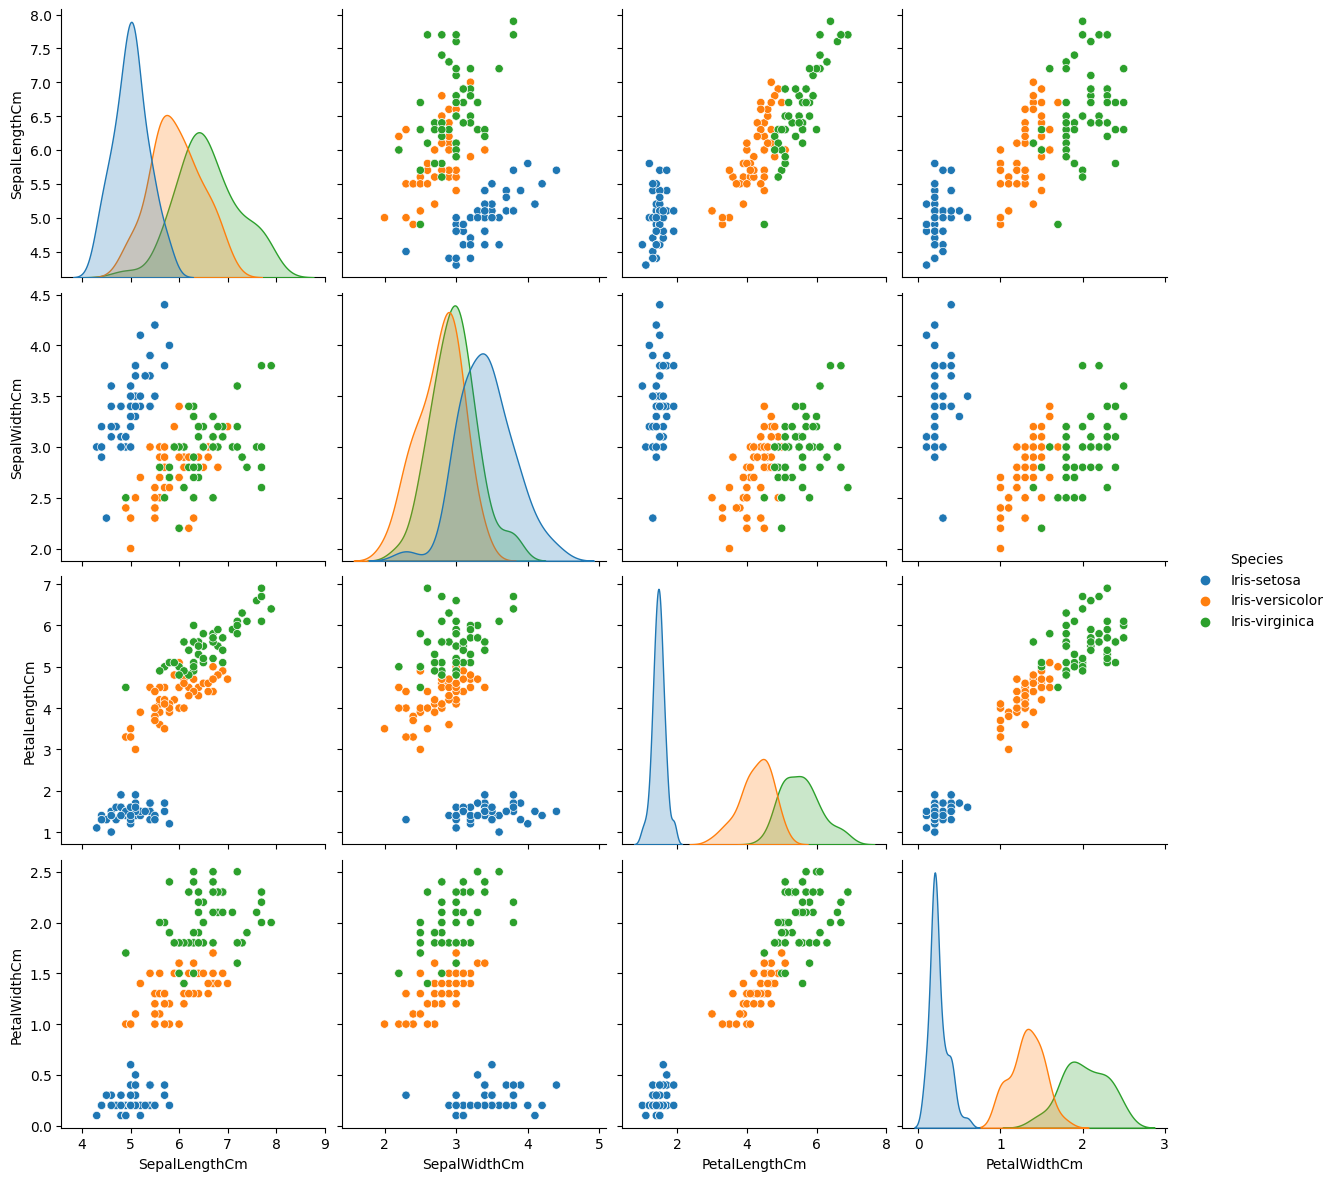

In [44]:
sns.pairplot(df, hue="Species", height=3)

In [25]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

le = preprocessing.LabelEncoder()

X = df.drop(columns=['Species'],axis=1)

le.fit(df['Species'])

y = le.transform(df['Species'])


In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [55]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train) 
prediction=model.predict(X_test) 

print('The accuracy of the Decision Tree is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is: 0.98


In [40]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 4.5 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  DEPRECATION: pydotplus is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for pydotplus ... done
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [45]:
from six import StringIO

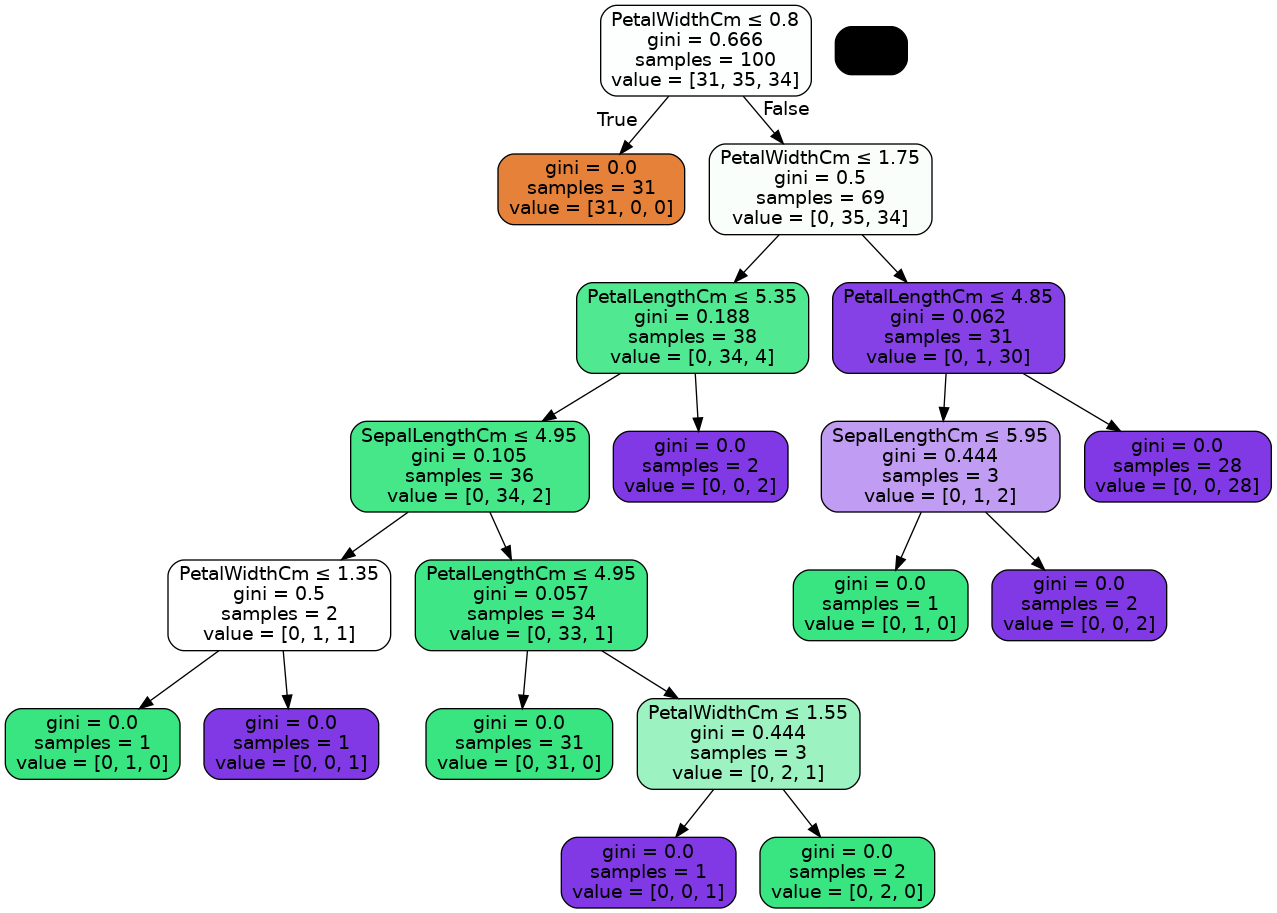

In [46]:
# Import necessary libraries for graph viz
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=X.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

https://www.kaggle.com/code/guslovesmath/iris-species-data-visualization-ml-models
https://www.kaggle.com/code/benhamner/python-data-visualizations
https://www.kaggle.com/code/ash316/ml-from-scratch-with-iris